In [1]:
import pandas as pd

data_path = 'creditcard.csv'
raw_data = pd.read_csv(data_path)
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [3]:
frauds_rate = round(raw_data['Class'].value_counts()[1]/len(raw_data)*100, 2)
print('Frauds', frauds_rate, '% of the dataset')

Frauds 0.17 % of the dataset


In [4]:
raw_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
len(raw_data)

284807

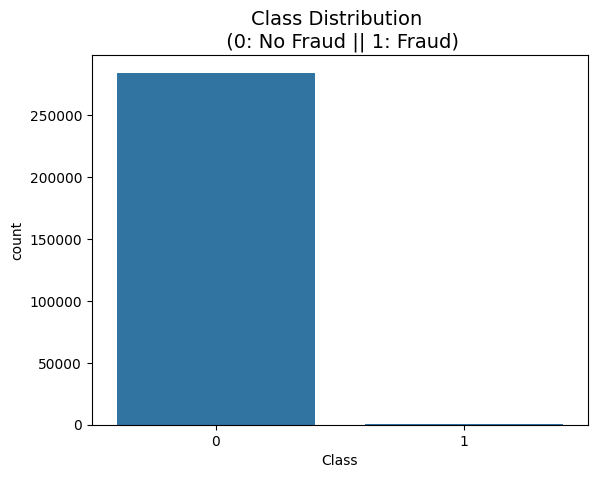

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=raw_data, x='Class')
plt.title('Class Distribution \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()

In [7]:
#모든 행. 열은 두번째 열부터 마지막 직전 열까지
X = raw_data.iloc[:, 1:-1]
y = raw_data.iloc[:, -1]

X.shape, y.shape

((284807, 29), (284807,))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=77, stratify=y)

In [9]:
import numpy as np
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([199020,    344], dtype=int64))

In [10]:
tr_fraud = np.unique(y_train, return_counts=True)[1]
print(tr_fraud)
tr_fraud[1]/len(y_train)*100

[199020    344]


0.17254870488152324

In [11]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([85295,   148], dtype=int64))

In [12]:
test_fraud = np.unique(y_test, return_counts=True)[1]
test_fraud[1]/len(y_test)*100

0.17321489179921118

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test , pred)
    pre = precision_score(y_test , pred)
    re = recall_score(y_test , pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc, pre, re, f1, auc

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

    print('=> 오차 행렬')
    print(confusion)
    print('==========')

    print('정확도: {0:.4f}, 정밀도: {1:.4f}'.format(acc, pre))
    print('재현율: {0:.4f}, F1: {1:.4f}, AUC:{2:.4f}'.format(re, f1, auc))

In [19]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state=77, solver='liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test, lr_pred)

=> 오차 행렬
[[85281    14]
 [   61    87]]
정확도: 0.9991, 정밀도: 0.8614
재현율: 0.5878, F1: 0.6988, AUC:0.7938


In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=77, max_depth=3)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

print_clf_eval(y_test, dt_pred)

=> 오차 행렬
[[85277    18]
 [   47   101]]
정확도: 0.9992, 정밀도: 0.8487
재현율: 0.6824, F1: 0.7566, AUC:0.8411


In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=77, n_jobs=-1, n_estimators=10)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

=> 오차 행렬
[[85285    10]
 [   32   116]]
정확도: 0.9995, 정밀도: 0.9206
재현율: 0.7838, F1: 0.8467, AUC:0.8918


In [22]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    return get_clf_eval(y_test, pred)

In [23]:
#여러 모델의 성능 쉽게 비교하도록 DataFrame으로 만드는 함수
models = [lr_clf, dt_clf, rf_clf]
model_names = ['LogisticReg', 'DecisionTree', 'RandomForest']

def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    tmp=[]
    
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))
        
    return pd.DataFrame(tmp, columns=col_names, index=model_names)

results=get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
results

,accuracy,precision,recall,f1,roc_auc
LogisticReg,0.999122,0.861386,0.587838,0.698795,0.793837
DecisionTree,0.999239,0.848739,0.682432,0.756554,0.841111
RandomForest,0.999508,0.920635,0.783784,0.846715,0.891833


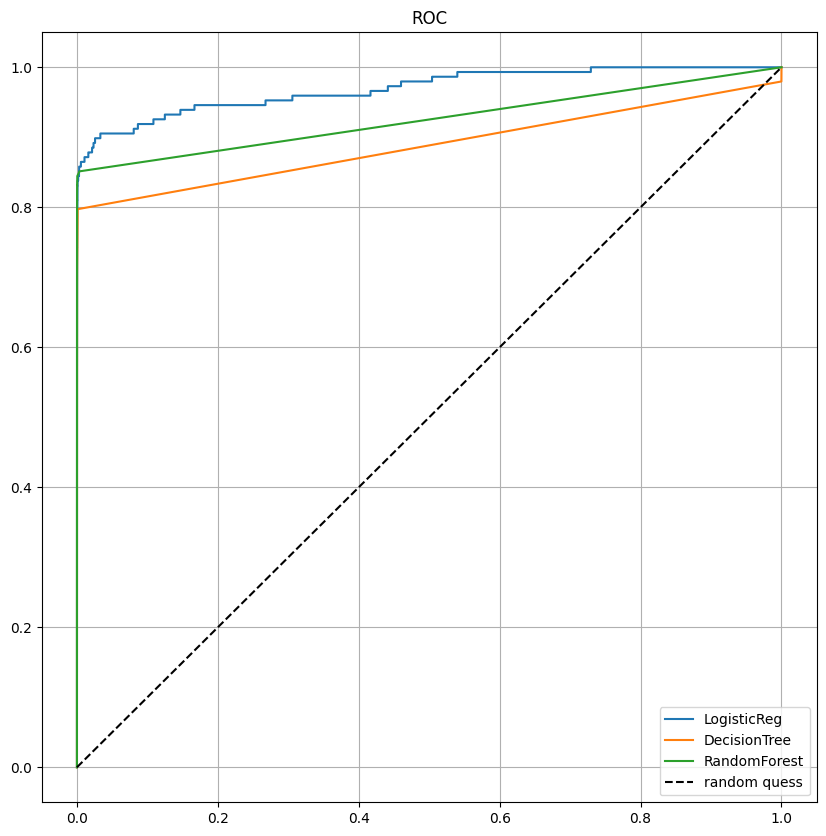

In [24]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10,10))
    
    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])
        
    plt.plot([0,1],[0,1], 'k--', label='random quess')
    plt.title('ROC')
    plt.legend()
    plt.grid()
    plt.show()

draw_roc_curve(models, model_names, X_test, y_test)


In [25]:
samples = [1, 7, 9, 16, 36, 39, 45, 45, 46, 48, 51, 100, 101]
tmp_y = [1] * len(samples)
print(tmp_y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


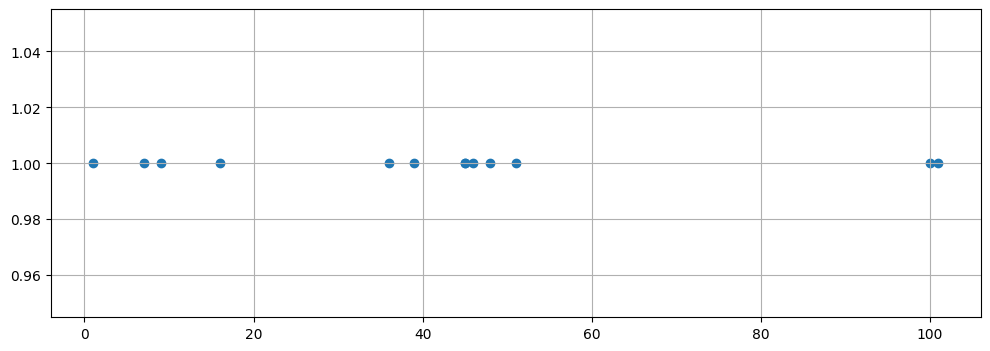

In [26]:
plt.figure(figsize=(12,4))
plt.scatter(samples, tmp_y)
plt.grid()
plt.show()

In [27]:
np.median(samples)

45.0

In [30]:
np.percentile(samples, 25)

16.0

In [31]:
np.percentile(samples, 75)

48.0

In [32]:
np.percentile(samples, 75) - np.percentile(samples, 25)

32.0

In [33]:
iqr = np.percentile(samples, 75) - np.percentile(samples, 25)
iqr * 1.5

48.0

In [34]:
q1 = np.percentile(samples, 25)
q2 = np.median(samples)
q3 = np.percentile(samples, 75)
upper_fence = q3 + iqr*1.5
lower_fence = q1 - iqr*1.5

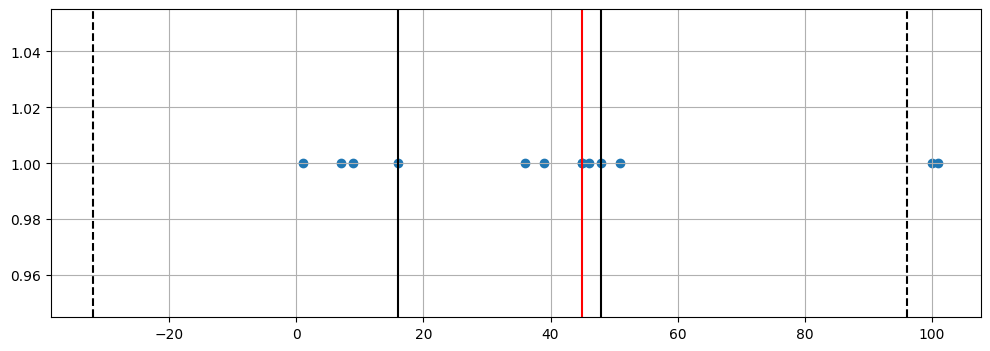

In [35]:
plt.figure(figsize = (12, 4))
plt.scatter(samples, tmp_y)
plt.axvline(x = q1, color = 'black')
plt.axvline(x = q2, color = 'red')
plt.axvline(x = q3, color = 'black')
plt.axvline(x = upper_fence, color = 'black', ls = 'dashed')
plt.axvline(x = lower_fence, color = 'black', ls = 'dashed')
plt.grid()
plt.show()

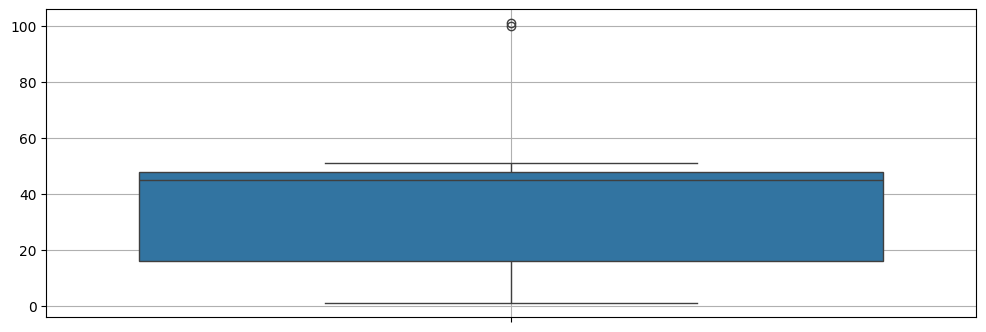

In [36]:
plt.figure(figsize=(12,4))
sns.boxplot(samples)
plt.grid()
plt.show()

<Axes: >

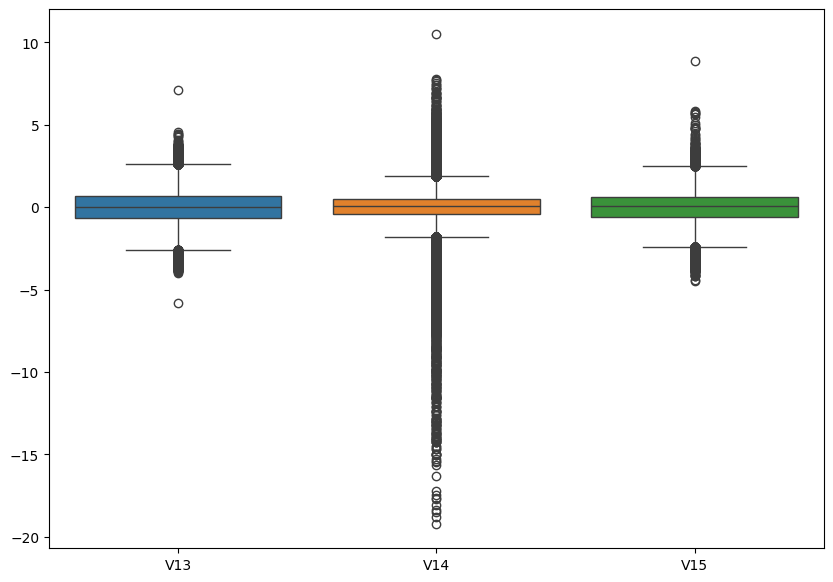

In [38]:
plt.figure(figsize=(10,7))
sns.boxplot(data=raw_data[['V13', 'V14', 'V15']])

In [39]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index

    return outlier_index

In [40]:
get_outlier(df=raw_data, column='V14', weight=1.5)

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [42]:
raw_data_copy = raw_data.iloc[:, 1:-1]
raw_data_copy.shape

(284807, 29)

In [43]:
outlier_index = get_outlier(df=raw_data, column='V14', weight=1.5)
raw_data_copy.drop(outlier_index, axis=0, inplace=True)
raw_data_copy.shape

(284803, 29)

In [44]:
X = raw_data_copy

raw_data.drop(outlier_index, axis=0, inplace=True)
y = raw_data.iloc[:, -1]

X_train, X_test, y_train, y_test =\
            train_test_split(X, y, test_size=0.3,
                             random_state=77, stratify=y)

In [45]:
models = [lr_clf, dt_clf, rf_clf]
model_names = ['LogisticReg.', 'DecisionTree', 'RandomForest']

results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)
results

,accuracy,precision,recall,f1,roc_auc
LogisticReg.,0.999239,0.858407,0.664384,0.749035,0.832098
DecisionTree,0.999298,0.852459,0.712329,0.776119,0.856059
RandomForest,0.999579,0.950820,0.794521,0.865672,0.897225


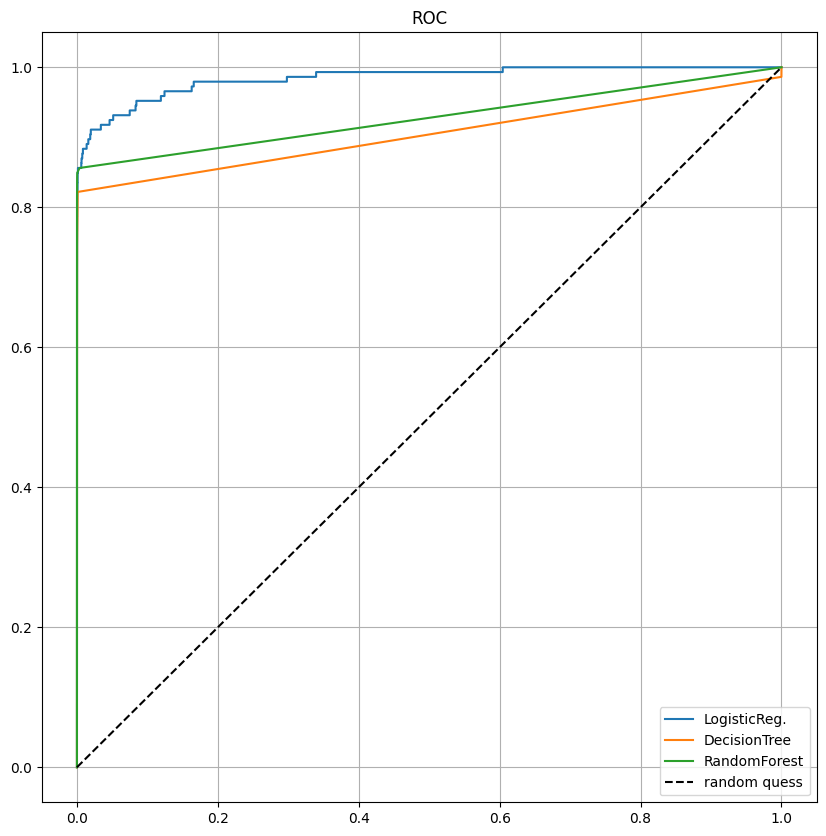

In [46]:
draw_roc_curve(models, model_names, X_test, y_test)